In [9]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
import time
from datetime import datetime
from config import weather_api_key


In [10]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
#create a set of random latitude and longitute combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
#add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

644

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#loop through all the cities in our list
for i, city in enumerate(cities):
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i>=50):
        set_count +=1
        record_cout=1
        time.sleep(60)
    #create an endpoint URL with each city
    city_url = url + '&q=' + city.replace(' ' ,'+')
    #Log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    #add 1 to the record count
    record_count +=1
    #Run an API request for each of the cities
    try:
        #parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #parse the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #append the city info into the city_data list
        city_data.append({'City':city.title(),
                         'Lat': city_lat,
                         'Lng':city_lng,
                         'Max Temp':city_max_temp,
                         'Humidity': city_humidity,
                         'Cloudiness':city_clouds,
                         'Wind Speed': city_wind,
                         'Country':city_country,
                         'Date': city_date})
    #if an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
#indicate that Data loading is complete
print('------------------------------')
print('Data Retrieval Complete')
print('------------------------------')

        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | plaster rock
Processing Record 2 of Set 1 | kiama
Processing Record 3 of Set 1 | rosita
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | scarborough
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | bambous virieux
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | shchelyayur
City not found. Skipping...
Processing Record 16 of Set 1 | samarai
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | teguise
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | bacuit
City not found. Skipping...
Process

Processing Record 182 of Set 4 | svetlaya
Processing Record 183 of Set 4 | losinyy
Processing Record 184 of Set 4 | pisco
Processing Record 185 of Set 4 | kisangani
Processing Record 186 of Set 4 | jeremie
Processing Record 187 of Set 4 | sao joao da barra
Processing Record 188 of Set 4 | hendijan
City not found. Skipping...
Processing Record 189 of Set 4 | bilma
Processing Record 190 of Set 4 | la ronge
Processing Record 191 of Set 4 | tuatapere
Processing Record 192 of Set 4 | coihaique
Processing Record 193 of Set 4 | yonago
Processing Record 194 of Set 4 | ahipara
Processing Record 195 of Set 4 | cetraro
Processing Record 196 of Set 4 | barra dos coqueiros
Processing Record 197 of Set 4 | guaymas
Processing Record 198 of Set 4 | dzaoudzi
Processing Record 199 of Set 4 | casa nova
Processing Record 200 of Set 4 | ponta do sol
Processing Record 201 of Set 5 | carnarvon
Processing Record 202 of Set 5 | lingsugur
Processing Record 203 of Set 5 | georgetown
Processing Record 204 of Set 

Processing Record 367 of Set 8 | te anau
Processing Record 368 of Set 8 | ancud
Processing Record 369 of Set 8 | husavik
Processing Record 370 of Set 8 | senanga
Processing Record 371 of Set 8 | porlamar
Processing Record 372 of Set 8 | gamba
Processing Record 373 of Set 8 | takoradi
Processing Record 374 of Set 8 | faya
Processing Record 375 of Set 8 | nizhniy baskunchak
Processing Record 376 of Set 8 | spencer
Processing Record 377 of Set 8 | xihe
Processing Record 378 of Set 8 | shingu
Processing Record 379 of Set 8 | olafsvik
Processing Record 380 of Set 8 | inhambane
Processing Record 381 of Set 8 | bathsheba
Processing Record 382 of Set 8 | saint george
Processing Record 383 of Set 8 | portree
Processing Record 384 of Set 8 | belmonte
Processing Record 385 of Set 8 | peleduy
Processing Record 386 of Set 8 | sorland
Processing Record 387 of Set 8 | aklavik
Processing Record 388 of Set 8 | amapa
Processing Record 389 of Set 8 | san quintin
Processing Record 390 of Set 8 | manacapur

Processing Record 550 of Set 11 | bilokurakyne
Processing Record 551 of Set 12 | buala
Processing Record 552 of Set 12 | kibaya
Processing Record 553 of Set 12 | barra patuca
Processing Record 554 of Set 12 | banapur
Processing Record 555 of Set 12 | shemonaikha
Processing Record 556 of Set 12 | kieta
Processing Record 557 of Set 12 | yanam
Processing Record 558 of Set 12 | conde
Processing Record 559 of Set 12 | berlevag
Processing Record 560 of Set 12 | pleshanovo
Processing Record 561 of Set 12 | andapa
Processing Record 562 of Set 12 | mackay
Processing Record 563 of Set 12 | khorixas
Processing Record 564 of Set 12 | sogamoso
Processing Record 565 of Set 12 | hosakote
Processing Record 566 of Set 12 | busembatia
Processing Record 567 of Set 12 | namatanai
Processing Record 568 of Set 12 | bousse
Processing Record 569 of Set 12 | romitan
Processing Record 570 of Set 12 | nishihara
Processing Record 571 of Set 12 | byron bay
Processing Record 572 of Set 12 | bhachau
Processing Recor

In [13]:
len(city_data)

593

In [14]:
#convert to dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Plaster Rock,46.9065,-67.3900,41.52,33,2,15.26,CA,2022-04-23 18:05:42
1,Kiama,-34.6833,150.8667,61.00,92,19,4.09,AU,2022-04-23 18:01:49
2,Rosita,13.9268,-84.4032,90.46,45,58,4.61,NI,2022-04-23 18:05:43
3,Rikitea,-23.1203,-134.9692,75.18,74,100,4.99,PF,2022-04-23 18:05:43
4,Ushuaia,-54.8000,-68.3000,46.06,71,75,9.22,AR,2022-04-23 18:05:44


In [15]:
column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Plaster Rock,CA,2022-04-23 18:05:42,46.9065,-67.3900,41.52,33,2,15.26
1,Kiama,AU,2022-04-23 18:01:49,-34.6833,150.8667,61.00,92,19,4.09
2,Rosita,NI,2022-04-23 18:05:43,13.9268,-84.4032,90.46,45,58,4.61
3,Rikitea,PF,2022-04-23 18:05:43,-23.1203,-134.9692,75.18,74,100,4.99
4,Ushuaia,AR,2022-04-23 18:05:44,-54.8000,-68.3000,46.06,71,75,9.22


In [18]:
#create the output file (csv)
output_data_file = 'weather_data/cities.csv'
#export the city_data inta a csv
city_data_df.to_csv(output_data_file, index_label = 'City_ID')


In [19]:
#extract relevant fields from the dataframe for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

<function matplotlib.pyplot.show(close=None, block=None)>

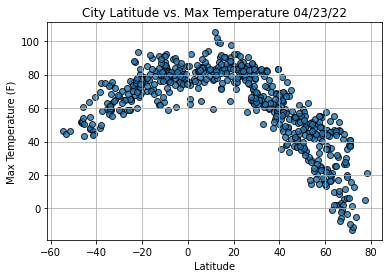

In [23]:
#import time module
import time
#build the scatter plot for latitude vs max temp
plt.scatter(lats, max_temps,
           edgecolor = 'black',
           linewidths=1,
           marker = 'o',
           alpha = 0.8,
           label = 'Cities')
#incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig1.png')

#show plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

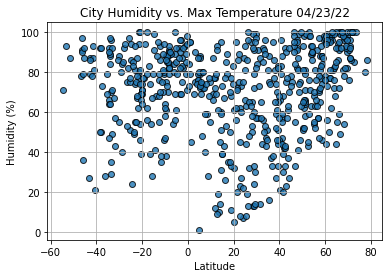

In [24]:
#build the scatter plot for latitude vs max temp
plt.scatter(lats, humidity,
           edgecolor = 'black',
           linewidths=1,
           marker = 'o',
           alpha = 0.8,
           label = 'Cities')
#incorporate the other graph properties
plt.title(f'City Humidity vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig2.png')

#show plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

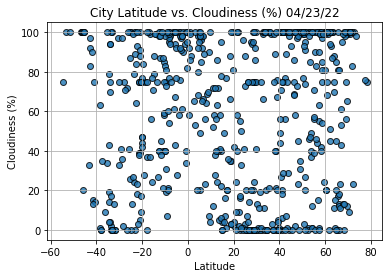

In [26]:
#build the scatter plot for latitude vs max temp
plt.scatter(lats, cloudiness,
           edgecolor = 'black',
           linewidths=1,
           marker = 'o',
           alpha = 0.8,
           label = 'Cities')
#incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig3.png')

#show plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

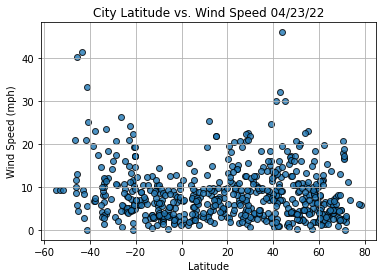

In [27]:
#build the scatter plot for latitude vs max temp
plt.scatter(lats, wind_speed,
           edgecolor = 'black',
           linewidths=1,
           marker = 'o',
           alpha = 0.8,
           label = 'Cities')
#incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig4.png')

#show plot
plt.show

In [35]:
from scipy.stats import linregress
#create funciton to perform linear regression on the weather data 
#and plot a regression line and the equation with the data

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    #run regression on hemisphere data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
    
    #calculate the regression line 
    regress_values = x_values*slope+intercept
    #get the equation of the line
    line_eq = 'y= ' + str(round(slope,2)) + 'x+ ' + str(round(intercept,2))
    #create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values, 'red')
    #annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()



In [36]:
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']<0)]

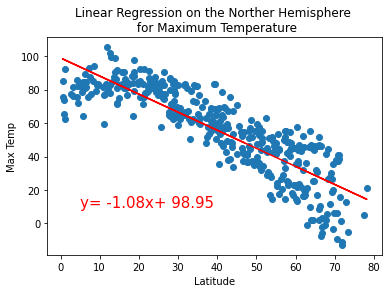

In [51]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

plot_linear_regression(x_values,y_values, 
                       'Linear Regression on the Norther Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (5,10))



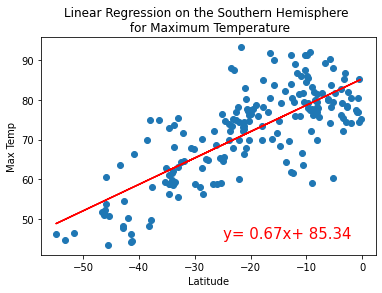

In [52]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plot_linear_regression(x_values,y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (-25,45))


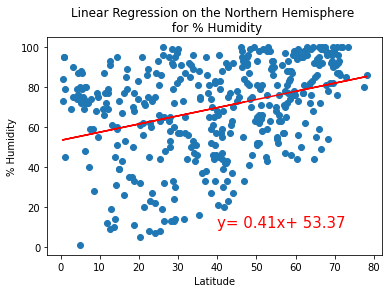

LinregressResult(slope=0.4092104836724217, intercept=53.36785998775902, rvalue=0.3490293494650552, pvalue=7.129757634495798e-13, stderr=0.05514180190306919, intercept_stderr=2.4543720475688877)


In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))
print(linregress(x_values,y_values))

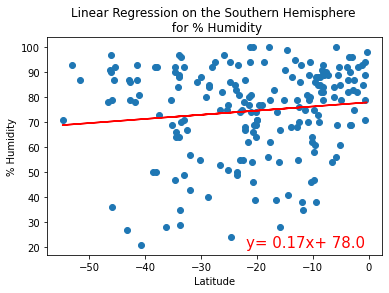

LinregressResult(slope=0.16624706017290164, intercept=77.99912608715027, rvalue=0.1214837915955064, pvalue=0.09152763601700888, stderr=0.09802941515777737, intercept_stderr=2.3898275221311853)


In [62]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-22,20))
print(linregress(x_values,y_values))

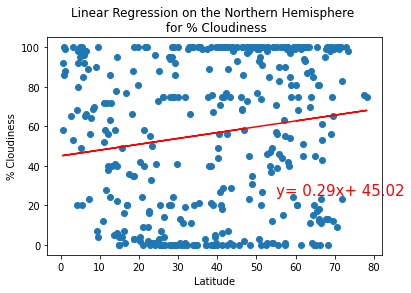

LinregressResult(slope=0.29466438733196837, intercept=45.0247594509146, rvalue=0.15230203900615574, pvalue=0.002284599236001636, stderr=0.0959688773174615, intercept_stderr=4.271592907656415)


In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(55,25))
print(linregress(x_values,y_values))

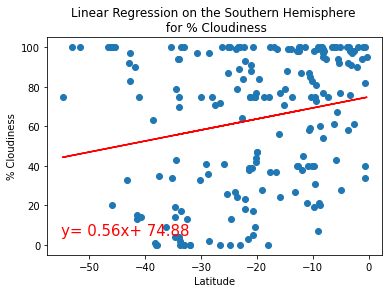

LinregressResult(slope=0.5577776784784257, intercept=74.88410312267962, rvalue=0.2118279604870508, pvalue=0.0030260691169390424, stderr=0.18571980872599564, intercept_stderr=4.527603368682456)


In [69]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,5))
print(linregress(x_values,y_values))

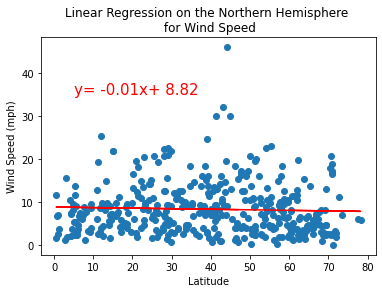

LinregressResult(slope=-0.012829501624109157, intercept=8.821135053816299, rvalue=-0.04314838585915324, pvalue=0.3900180276359486, stderr=0.014908890360975343, intercept_stderr=0.663597533982842)


In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(5,35))
print(linregress(x_values,y_values))

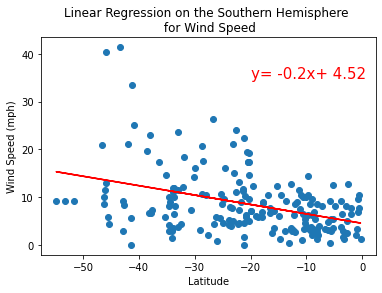

LinregressResult(slope=-0.19724633674332334, intercept=4.518408497783389, rvalue=-0.39139755782021995, pvalue=1.670530196366849e-08, stderr=0.033468225320256076, intercept_stderr=0.8159110799396637)


In [74]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-20,35))
print(linregress(x_values,y_values))